# Exploratory Data Analysis using Python
Pandas is a library we will be using often, and is something we will use to explore data and perform EDA.  We will also use numpy and scipy.
  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns


#### Reading a CSV file

In [2]:
collegeplace = pd.read_csv("collegePlace.csv")
collegeplace

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1
...,...,...,...,...,...,...,...,...
2961,23,Male,Information Technology,0,7,0,0,0
2962,23,Male,Mechanical,1,7,1,0,0
2963,22,Male,Information Technology,1,7,0,0,0
2964,22,Male,Computer Science,1,7,0,0,0


### Let us load the diamonds dataset from Seaborn

In [3]:
df = sns.load_dataset('diamonds')
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# df.rename(columns = {'price':'dollars'}, inplace = True)

<AxesSubplot:>

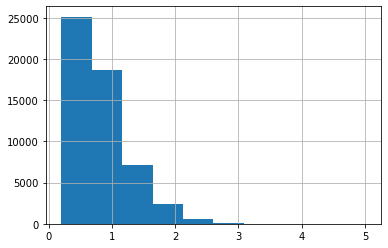

In [6]:
df.carat.hist()

In [7]:
df.depth.max() - df.depth.min()

36.0

In [8]:
df.cov()


,carat,depth,table,price,x,y,z
carat,0.224687,0.019167,0.192365,1.742765e+03,0.518484,0.515248,0.318917
depth,0.019167,2.052404,-0.946840,-6.085371e+01,-0.040641,-0.048009,0.095968
table,0.192365,-0.946840,4.992948,1.133318e+03,0.489643,0.468972,0.237996
price,1742.765364,-60.853712,1133.318064,1.591563e+07,3958.021491,3943.270810,2424.712613
x,0.518484,-0.040641,0.489643,3.958021e+03,1.258347,1.248789,0.768487
y,0.515248,-0.048009,0.468972,3.943271e+03,1.248789,1.304472,0.767320
z,0.318917,0.095968,0.237996,2.424713e+03,0.768487,0.767320,0.498011


In [9]:
df[['carat', 'depth']].corr()

,carat,depth
carat,1.000000,0.028224
depth,0.028224,1.000000


In [10]:
df.quantile(0.3)

carat       0.42
depth      61.20
table      56.00
price    1087.00
x           4.82
y           4.83
z           2.98
Name: 0.3, dtype: float64

In [11]:
from scipy.stats import zscore

zscores = zscore(df[['carat', 'depth']])


# Verify z-scores have mean of 0 and standard deviation of 1:
print('Z-scores are: ', zscores, '\n')

print('Mean is: ', zscores.mean(axis = 0), '\n')

print('Std Deviation is: ', zscores.std(axis = 0), '\n')


Z-scores are:  [[-1.19816781 -0.17409151]
 [-1.24036129 -1.36073849]
 [-1.19816781 -3.38501862]
 ...
 [-0.20662095  0.73334442]
 [ 0.13092691 -0.52310533]
 [-0.10113725  0.31452784]] 

Mean is:  [ 2.44487823e-16 -3.99690168e-15] 

Std Deviation is:  [1. 1.] 



In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [13]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [14]:
df.mean()

carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

In [15]:
df.median()

carat       0.70
depth      61.80
table      57.00
price    2401.00
x           5.70
y           5.71
z           3.53
dtype: float64

In [16]:
df.mode()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.3,Ideal,G,SI1,62.0,56.0,605,4.37,4.34,2.7


In [17]:
df.min()

carat      0.2
depth     43.0
table     43.0
price    326.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [18]:
df.var()

carat    2.246867e-01
depth    2.052404e+00
table    4.992948e+00
price    1.591563e+07
x        1.258347e+00
y        1.304472e+00
z        4.980109e-01
dtype: float64

In [19]:
df.std()

carat       0.474011
depth       1.432621
table       2.234491
price    3989.439738
x           1.121761
y           1.142135
z           0.705699
dtype: float64

In [20]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


In [21]:
df.cov()

,carat,depth,table,price,x,y,z
carat,0.224687,0.019167,0.192365,1.742765e+03,0.518484,0.515248,0.318917
depth,0.019167,2.052404,-0.946840,-6.085371e+01,-0.040641,-0.048009,0.095968
table,0.192365,-0.946840,4.992948,1.133318e+03,0.489643,0.468972,0.237996
price,1742.765364,-60.853712,1133.318064,1.591563e+07,3958.021491,3943.270810,2424.712613
x,0.518484,-0.040641,0.489643,3.958021e+03,1.258347,1.248789,0.768487
y,0.515248,-0.048009,0.468972,3.943271e+03,1.248789,1.304472,0.767320
z,0.318917,0.095968,0.237996,2.424713e+03,0.768487,0.767320,0.498011


In [22]:
df.quantile([.1,.3,.5,.75])

,carat,depth,table,price,x,y,z
0.10,0.31,60.0,55.0,646.00,4.36,4.36,2.69
0.30,0.42,61.2,56.0,1087.00,4.82,4.83,2.98
0.50,0.70,61.8,57.0,2401.00,5.70,5.71,3.53
0.75,1.04,62.5,59.0,5324.25,6.54,6.54,4.04


<AxesSubplot:>

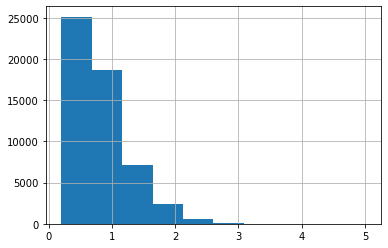

In [23]:
df.carat.hist()

<AxesSubplot:>

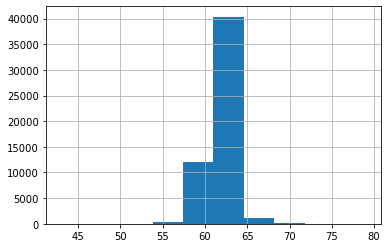

In [24]:
df.depth.hist()

<AxesSubplot:>

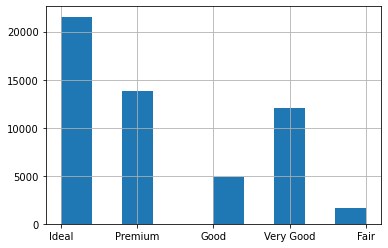

In [25]:
df.cut.hist()

In [26]:
x = df.groupby(['cut', 'clarity']).agg({"price": "sum", "clarity": "count", "table": "mean"})

In [27]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [29]:
import numpy as np

df.pivot_table(index = ['clarity', 'cut'],
              columns = ['color'],
              values = ['depth', 'price', 'x'],
              aggfunc = {'depth': np.mean,
                        'price': [min, max, np.median],
                        'x': np.median}
              )

depth                                              \
                        mean                                               
color                      D          E          F          G          H   
clarity cut                                                                
IF      Ideal      61.496429  61.716456  61.614925  61.663951  61.557522   
        Premium    61.070000  60.859259  61.112903  60.904598  61.290000   
        Very Good  61.513043  61.160465  61.123881  61.470886  61.858621   
        Good       60.877778  61.811111  60.620000  61.509091  61.975000   
        Fair       60.766667        NaN  58.925000  61.300000        NaN   
VVS1    Ideal      61.710417  61.608358  61.649545  61.667508  61.720552   
        Premium    61.182500  61.219048  61.121250  61.060234  61.353571   
        Very Good  61.675000  61.504118  61.545977  61.586316  61.980000   
        Good       61.653846  61.525581  62.291429  61.987805  62.477419   
        Fair       61.666667  59.600000  59.100000  60.066667  56.500000   
VVS2    Ideal      61.584859  61.681460  61.646923  61.692377  61.753633   
        Premium    61.024468  61.076860  61.277397  61.297091  61.496610   
        Very Good  61.328369  61.497315  61.541767  61.821523  61.895862   
        Good       62.284000  62.192308  61.824000  62.625333  62.562222   
        Fair       61.677778  60.623077  62.610000  64.376471  63.600000   
VS1     Ideal      61.620228  61.638449  61.660065  61.696642  61.789293   
        Premium    61.132824  61.119863  61.197241  61.419965  61.398512   
        Very Good  61.553143  61.593174  61.495222  61.701620  62.004669   
        Good       61.597674  61.602247  61.317424  62.446711  62.277922   
        Fair       63.160000  61.371429  62.430303  63.353333  63.309375   
VS2     Ideal      61.688478  61.717077  61.726394  61.726813  61.804317   
        Premium    61.146313  61.259459  61.303231  61.287933  61.324624   
        Very Good  61.968285  61.782903  61.807082  61.901670  61.913564   
        Good       62.758654  61.877500  62.487500  62.365104  62.675362   
        Fair       62.684000  64.476190  63.577358  63.880000  63.960976   
SI1     Ideal      61.736179  61.713708  61.669079  61.717424  61.763041   
        Premium    61.254317  61.229153  61.346875  61.340106  61.332824   
        Very Good  61.822470  61.947764  61.942039  61.963502  61.990676   
        Good       62.755696  62.754085  62.499267  62.896618  62.585957   
        Fair       64.634483  63.226154  63.230120  64.513043  64.488000   
SI2     Ideal      61.673876  61.680171  61.708830  61.732510  61.627111   
        Premium    61.099287  61.095376  61.174761  61.183943  61.219194   
        Very Good  61.743631  61.764719  61.782216  62.011009  62.006997   
        Good       62.063229  61.986634  62.250746  62.544172  62.391139   
        Fair       64.703571  63.448718  63.834831  64.573750  64.931868   
I1      Ideal      61.453846  61.850000  61.588095  61.400000  61.657895   
        Premium    61.900000  60.806667  61.150000  61.113043  61.247826   
        Very Good  62.200000  61.481818  61.561538  61.943750  61.816667   
        Good       61.350000  61.660870  62.889474  62.568421  61.757143   
        Fair       65.600000  65.644444  65.657143  65.333962  65.759615   

                                           price                    ...  \
                                             max                    ...   
color                      I          J        D        E        F  ...   
clarity cut                                                         ...   
IF      Ideal      61.751579  61.956000  17590.0  18700.0  18435.0  ...   
        Premium    61.078261  61.458333  18279.0  17663.0  18102.0  ...   
        Very Good  61.278947  61.387500  18542.0  12895.0  18552.0  ...   
        Good       62.150000  62.466667  17499.0   6804.0   9867.0  ...   
        Fair             NaN        NaN   2211.0      NaN   3205.0  ...   
VVS

In [30]:
data = pd.DataFrame(
    {'state': ['New York', 'Florida', 'Arizona', 'New York', 'Florida', 'Arizona'], 
     'location': ['East', 'East', 'West', 'East', 'East', 'West'],
     'males': list(np.random.randint(100,150,6)),
     'females': list(np.random.randint(100,150,6)),
     'children': list(np.random.randint(100,150,6)),
     'politics': list(np.random.choice(["Red", "Blue"], size=(6), p=[.5, .5]))
    })

In [31]:
np.random.seed(1)
n = 25
df = pd.DataFrame(
    {'state': list(np.random.choice(["New York", "Florida", "California"], size=(n))), 
     'gender': list(np.random.choice(["Male", "Female"], size=(n), p=[.4, .6])),
     'education': list(np.random.choice(["High School", "Undergrad", "Grad"], size=(n))),
     'housing': list(np.random.choice(["Rent", "Own"], size=(n))),     
     'height': list(np.random.randint(140,200,n)),
     'weight': list(np.random.randint(100,150,n)),
     'income': list(np.random.randint(50,250,n)),
     'computers': list(np.random.randint(0,6,n))
    })

In [32]:
df

,state,gender,education,housing,height,weight,income,computers
0,Florida,Female,High School,Rent,183,130,168,3
1,New York,Female,High School,Own,160,141,226,1
2,New York,Female,Undergrad,Own,170,124,72,2
3,Florida,Female,Grad,Own,176,118,191,5
4,Florida,Female,Grad,Own,179,133,164,5
5,New York,Female,Undergrad,Own,147,102,147,4
6,New York,Female,High School,Own,185,144,231,5
7,Florida,Male,Grad,Rent,144,128,134,0
8,New York,Female,Undergrad,Rent,197,139,60,5
9,Florida,Female,Grad,Own,188,134,146,0


In [33]:
df.pivot_table(index = ['gender', 'state'],
               columns = ['education', 'housing'],
               values = ['income', 'computers'],
               aggfunc = {'income': [np.mean], 'computers': [np.median]})

computers                                      income  \
                     median                                        mean   
education              Grad      High School      Undergrad        Grad   
housing                 Own Rent         Own Rent       Own Rent    Own   
gender state                                                              
Female California       0.0  NaN         NaN  0.0       NaN  NaN  191.0   
       Florida          5.0  4.0         NaN  4.0       NaN  NaN  167.0   
       New York         3.0  5.0         3.0  NaN       4.0  5.0  234.0   
Male   California       2.0  NaN         5.0  NaN       1.0  NaN  193.0   
       Florida          NaN  0.0         NaN  NaN       NaN  1.0    NaN   
       New York         4.0  NaN         NaN  NaN       2.0  NaN  166.0   

                                                                     
                                                                     
education                High School               Undergrad         
housing             Rent         Own        Rent         Own   Rent  
gender state                                                         
Female California    NaN         NaN   86.666667         NaN    NaN  
       Florida     237.0         NaN  180.000000         NaN    NaN  
       New York    146.0       228.5         NaN  150.666667   60.0  
Male   California    NaN       184.0         NaN  199.000000    NaN  
       Florida     134.0         NaN         NaN         NaN  106.0  
       New York      NaN         NaN         NaN   93.000000    NaN

In [34]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(df, title = 'My EDA for NYU').to_file("output.html")

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [35]:
import pandas_profiling


In [36]:
y = df.pivot_table(index = ['gender', 'state'],
               columns = ['education', 'housing'],
               values = ['income', 'computers'],
               aggfunc = {'income': [np.mean], 'computers': [np.median]})

In [37]:
y

computers                                      income  \
                     median                                        mean   
education              Grad      High School      Undergrad        Grad   
housing                 Own Rent         Own Rent       Own Rent    Own   
gender state                                                              
Female California       0.0  NaN         NaN  0.0       NaN  NaN  191.0   
       Florida          5.0  4.0         NaN  4.0       NaN  NaN  167.0   
       New York         3.0  5.0         3.0  NaN       4.0  5.0  234.0   
Male   California       2.0  NaN         5.0  NaN       1.0  NaN  193.0   
       Florida          NaN  0.0         NaN  NaN       NaN  1.0    NaN   
       New York         4.0  NaN         NaN  NaN       2.0  NaN  166.0   

                                                                     
                                                                     
education                High School               Undergrad         
housing             Rent         Own        Rent         Own   Rent  
gender state                                                         
Female California    NaN         NaN   86.666667         NaN    NaN  
       Florida     237.0         NaN  180.000000         NaN    NaN  
       New York    146.0       228.5         NaN  150.666667   60.0  
Male   California    NaN       184.0         NaN  199.000000    NaN  
       Florida     134.0         NaN         NaN         NaN  106.0  
       New York      NaN         NaN         NaN   93.000000    NaN

In [38]:
y.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6 entries, ('Female', 'California') to ('Male', 'New York')
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   (computers, median, Grad, Own)          5 non-null      float64
 1   (computers, median, Grad, Rent)         3 non-null      float64
 2   (computers, median, High School, Own)   2 non-null      float64
 3   (computers, median, High School, Rent)  2 non-null      float64
 4   (computers, median, Undergrad, Own)     3 non-null      float64
 5   (computers, median, Undergrad, Rent)    2 non-null      float64
 6   (income, mean, Grad, Own)               5 non-null      float64
 7   (income, mean, Grad, Rent)              3 non-null      float64
 8   (income, mean, High School, Own)        2 non-null      float64
 9   (income, mean, High School, Rent)       2 non-null      float64
 10  (income, mean, Undergrad

In [39]:
y.shape

(6, 12)

In [40]:
df

,state,gender,education,housing,height,weight,income,computers
0,Florida,Female,High School,Rent,183,130,168,3
1,New York,Female,High School,Own,160,141,226,1
2,New York,Female,Undergrad,Own,170,124,72,2
3,Florida,Female,Grad,Own,176,118,191,5
4,Florida,Female,Grad,Own,179,133,164,5
5,New York,Female,Undergrad,Own,147,102,147,4
6,New York,Female,High School,Own,185,144,231,5
7,Florida,Male,Grad,Rent,144,128,134,0
8,New York,Female,Undergrad,Rent,197,139,60,5
9,Florida,Female,Grad,Own,188,134,146,0


In [41]:
df.iloc[4,2]

'Grad'

In [42]:
df.loc[4, 'housing']

'Own'

In [43]:
# Randomly replace 15% of the values with NaN

for row in range(df.shape[0]):
    for col in range(df.shape[1]):
        if np.random.uniform() < 0.15:
            df.iloc[row,col] = np.nan

In [44]:
n = df.iloc[:,4:]

In [45]:
n.replace(np.nan, -1, inplace=True)